In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
import warnings
warnings.filterwarnings('ignore')

In [76]:
import sys
sys.path

['/Users/Conlin/Desktop/PlayGround/Data_Analyze/Resign_Rate',
 '/usr/local/Cellar/python@3.9/3.9.0_1/Frameworks/Python.framework/Versions/3.9/lib/python39.zip',
 '/usr/local/Cellar/python@3.9/3.9.0_1/Frameworks/Python.framework/Versions/3.9/lib/python3.9',
 '/usr/local/Cellar/python@3.9/3.9.0_1/Frameworks/Python.framework/Versions/3.9/lib/python3.9/lib-dynload',
 '',
 '/usr/local/lib/python3.9/site-packages',
 '/usr/local/lib/python3.9/site-packages/IPython/extensions',
 '/Users/Conlin/.ipython']

In [77]:
from platform import python_version

print(python_version())

3.9.0


In [78]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [79]:
#查看数据
print(train_data.shape)
train_data.head(2)

(1176, 36)


,user_id,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1374,58,No,Travel_Rarely,605,Sales,21,3,Life Sciences,1,1938,4,Female,72,3,4,Manager,4,Married,17875,11761,4,Y,Yes,13,3,3,80,1,29,2,2,1,0,0,0
1,1092,45,No,Travel_Rarely,950,Research & Development,28,3,Technical Degree,1,1546,4,Male,97,3,1,Research Scientist,4,Married,2132,4585,4,Y,No,20,4,4,80,1,8,3,3,5,4,0,3


In [80]:
print(test_data.shape)
test_data.head(2)

(294, 35)


,user_id,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,442,36,Non-Travel,635,Sales,10,4,Medical,1,592,2,Male,32,3,3,Sales Executive,4,Single,9980,15318,1,Y,No,14,3,4,80,0,10,3,2,10,3,9,7
1,1091,33,Travel_Rarely,575,Research & Development,25,3,Life Sciences,1,1545,4,Male,44,2,2,Manufacturing Director,2,Single,4320,24152,1,Y,No,13,3,4,80,0,5,2,3,5,3,0,2


In [81]:
#观看标签分类大小
train_data['Attrition'].value_counts()

No     988
Yes    188
Name: Attrition, dtype: int64

In [82]:
#没有缺失值
train_data['Attrition']=train_data['Attrition'].apply(lambda x:0 if x=='No' else 1)
data=train_data.append(test_data)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 0 to 293
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   user_id                   1470 non-null   int64  
 1   Age                       1470 non-null   int64  
 2   Attrition                 1176 non-null   float64
 3   BusinessTravel            1470 non-null   object 
 4   DailyRate                 1470 non-null   int64  
 5   Department                1470 non-null   object 
 6   DistanceFromHome          1470 non-null   int64  
 7   Education                 1470 non-null   int64  
 8   EducationField            1470 non-null   object 
 9   EmployeeCount             1470 non-null   int64  
 10  EmployeeNumber            1470 non-null   int64  
 11  EnvironmentSatisfaction   1470 non-null   int64  
 12  Gender                    1470 non-null   object 
 13  HourlyRate                1470 non-null   int64  
 14  JobInvolv

In [83]:
#观察可知EmploymentNumber\StandardHors\Over18为无用数据列
#无缺失值以及异常值
data.describe()

,user_id,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1176.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,734.500000,36.923810,0.159864,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,424.496761,9.135373,0.366636,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,0.000000,18.000000,0.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,367.250000,30.000000,0.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,734.500000,36.000000,0.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,1101.750000,43.000000,0.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,1469.000000,60.000000,1.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [84]:
#删除无意义列
train_data.drop(columns=['EmployeeNumber','StandardHours','Over18'],inplace=True)
test_data.drop(columns=['EmployeeNumber','StandardHours','Over18'],inplace=True)
data.drop(columns=['EmployeeNumber','StandardHours','Over18'],inplace=True)

In [85]:
#获取定类变量
cat_list=[]
for i in train_data.columns:
    if train_data[i].dtype=='O':
        cat_list.append(i)
for n,i in enumerate(cat_list):
    cat_num=train_data[i].value_counts().index.shape[0]
    print('{0}.{1}特征的类型数量是:{2}'.format(n+1,i,cat_num))

1.BusinessTravel特征的类型数量是:3
2.Department特征的类型数量是:3
3.EducationField特征的类型数量是:6
4.Gender特征的类型数量是:2
5.JobRole特征的类型数量是:9
6.MaritalStatus特征的类型数量是:3
7.OverTime特征的类型数量是:2


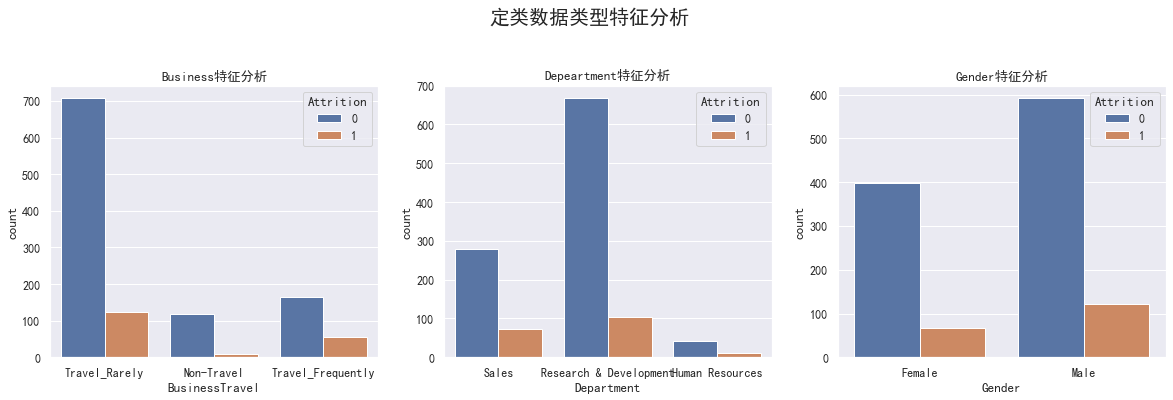

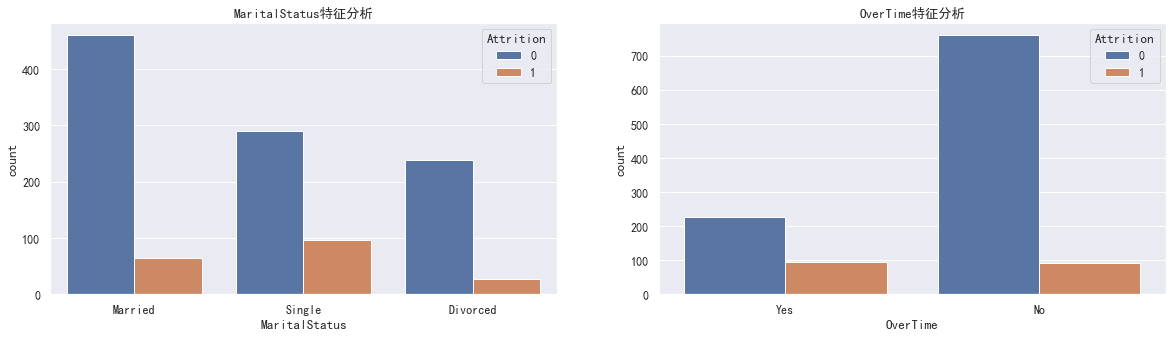

In [86]:
#对各个定类变量分别与标签进行可视化；
#观察可知经常出差的离职率是最高的；研究部门的人数占比最多，但是销售部门的人员流动性更高，即离职率更高；男性且单身的离职率相对较高
plt.rcParams['font.sans-serif'] = ['SimHei']  # 中文字体设置-黑体
plt.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题
sns.set(font='SimHei',font_scale=1.1)  # 解决Seaborn中文显示问题并调整字体大小
f,[ax1,ax2,ax3]=plt.subplots(1,3,figsize=(20,5))
sns.countplot(x='BusinessTravel',hue='Attrition',data=train_data,ax=ax1)
sns.countplot(x='Department',hue='Attrition',data=train_data,ax=ax2)
sns.countplot(x='Gender',hue='Attrition',data=train_data,ax=ax3)
ax1.set_title('Business特征分析')
ax2.set_title('Depeartment特征分析')
ax3.set_title('Gender特征分析')
f.suptitle('定类数据类型特征分析',size=20,y=1.1)
f,[ax1,ax2]=plt.subplots(1,2,figsize=(20,5))
sns.countplot(x='MaritalStatus',hue='Attrition',data=train_data,ax=ax1)
sns.countplot(x='OverTime',hue='Attrition',data=train_data,ax=ax2)
ax1.set_title('MaritalStatus特征分析')
ax2.set_title('OverTime特征分析')

plt.show()

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Manager'),
  Text(1, 0, 'Research Scientist'),
  Text(2, 0, 'Sales Executive'),
  Text(3, 0, 'Sales Representative'),
  Text(4, 0, 'Laboratory Technician'),
  Text(5, 0, 'Manufacturing Director'),
  Text(6, 0, 'Human Resources'),
  Text(7, 0, 'Research Director'),
  Text(8, 0, 'Healthcare Representative')])

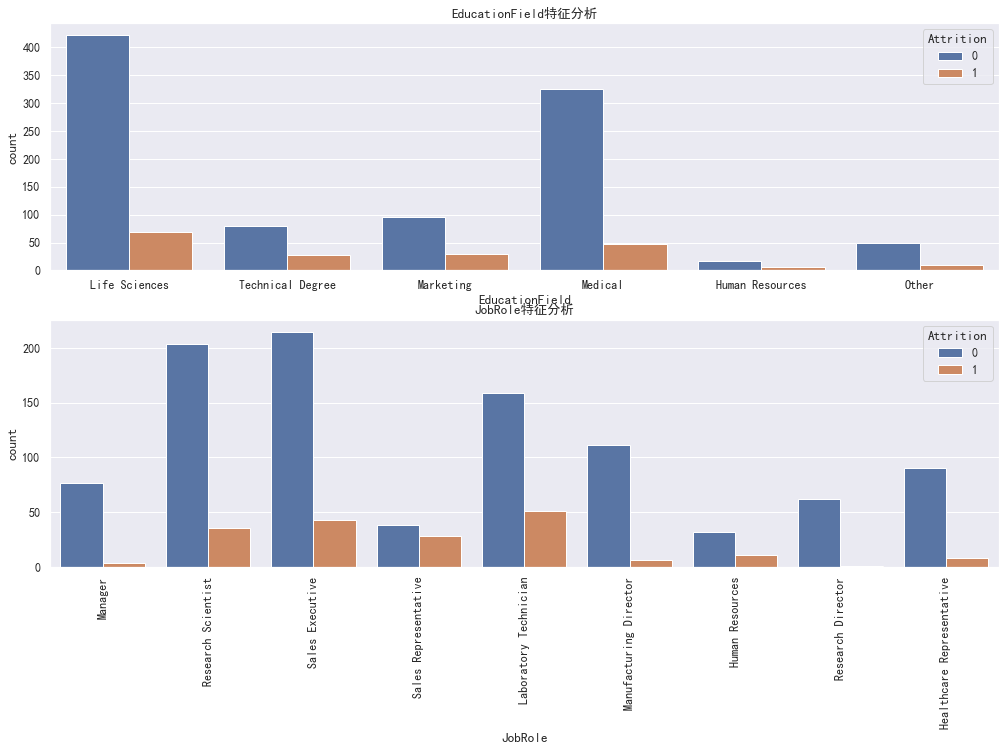

In [87]:
f,[ax1,ax2]=plt.subplots(2,1,figsize=(17,10))
sns.countplot(x='EducationField',hue='Attrition',data=train_data,ax=ax1)
sns.countplot(x='JobRole',hue='Attrition',data=train_data,ax=ax2)
ax1.set_title(u'EducationField特征分析')
ax2.set_title(u'JobRole特征分析')
plt.xticks(rotation=90)

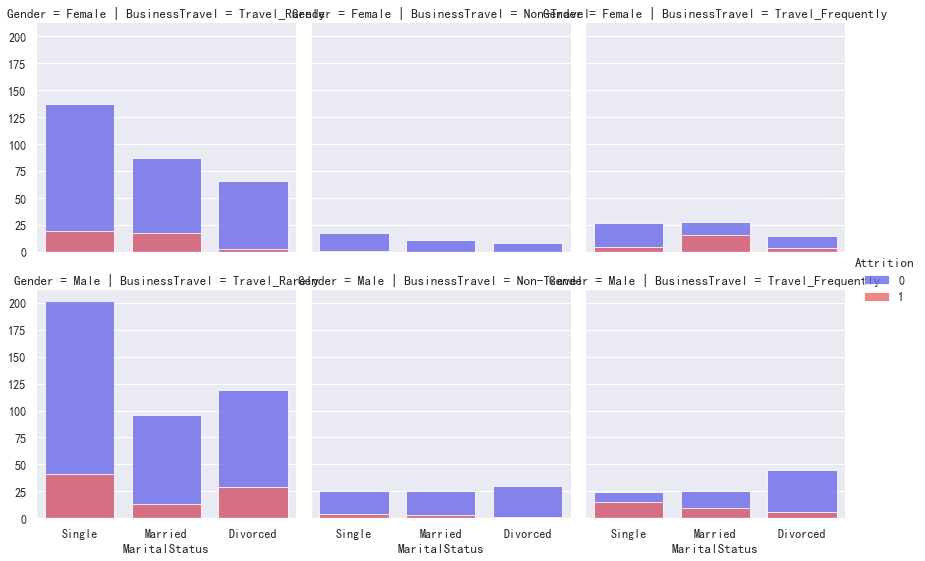

In [88]:
#在不同出差频率下，男性和女性在单身情况的数量对比
grid=sns.FacetGrid(train_data,row='Gender',col='BusinessTravel',hue='Attrition',palette='seismic',size=4)
grid.map(sns.countplot,'MaritalStatus',alpha=0.8)
grid.add_legend()
#经常出差的单身女性离职率很高

<AxesSubplot:xlabel='PercentSalaryHike', ylabel='Attrition'>

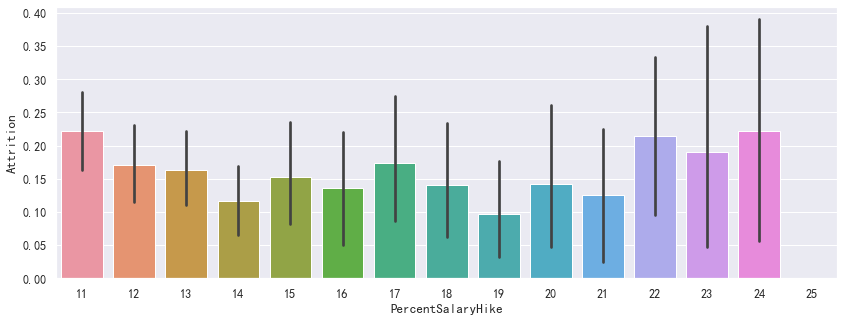

In [89]:
#工资提成的离职情况分布
plt.figure(figsize=(14,5))
sns.barplot(x='PercentSalaryHike',y='Attrition',data=train_data)

<AxesSubplot:xlabel='Age', ylabel='Attrition'>

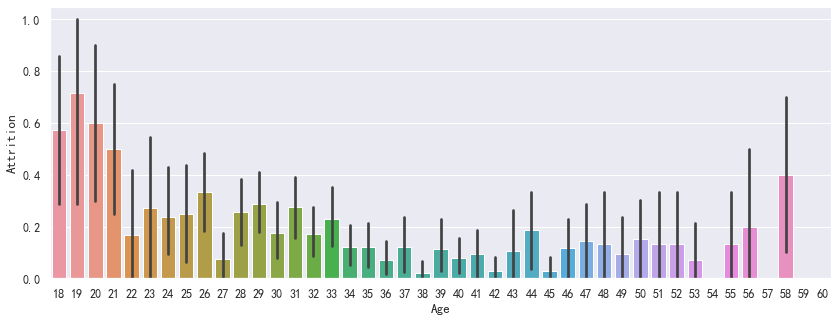

In [90]:
#年龄的离职情况分布
plt.figure(figsize=(14,5))
sns.barplot(x='Age',y='Attrition',data=train_data)

<AxesSubplot:xlabel='StartWorking', ylabel='Attrition'>

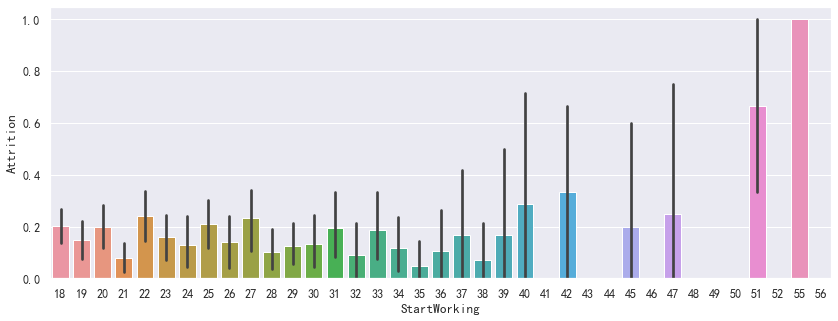

In [91]:
#开始工作年龄
data['StartWorking']=data['Age']-data['TotalWorkingYears']
plt.figure(figsize=(14,5))
sns.barplot(x='StartWorking',y='Attrition',data=data.iloc[:train_data.shape[0]])

In [92]:
#根据可视化图重设年龄分组便于后续分类
def resetAge(input):
    if ((input < 24) & (input > 18)) | (input == 58):
        return 1
    elif (input == 18) | (input == 48) |(input == 54) | (input == 57) | (input > 58) :
        return 0
    else:
        return 2
#根据可视化图重设薪酬分组便于后续分类
def resetSalary(input):
    if (input>0) & (input<3725):
        return 0
    elif (input>=3725) & (input<111250):
        return 1
    else:
        return 2
#根据可视化图重设工资提高百分比分组便于后续分类
def resetPerHike(input):
    if (input>=22) & (input<25):
        return 0
    elif ((input>=11) & (input<14)) |((input>14) & (input <22)):
        return 1
    else:
        return 2
#根据可视化图重设开始工作年龄分组
def resetStart(input):
    if (input==49)|(input==51):
        return 3
    elif (input==22)|(input==27)|(input==31)|(input==40):
        return 2
    elif (input==42)|((input>43)&(input<49))|(input==50)|(input>=52):
        return 0
    else:
        return 1

In [93]:
data['Age']=data['Age'].apply(resetAge)
data['MonthlyIncome']=data['MonthlyIncome'].apply(resetSalary)
data['PercentSalaryHike']=data['PercentSalaryHike'].apply(resetPerHike)
data['StartWorking']=data['StartWorking'].apply(resetStart)

In [94]:
#独热编码
cata_result = pd.DataFrame()
for i in data.columns:
    if data[i].dtype == 'O':
        cata = pd.DataFrame()
        cata = pd.get_dummies(data[i],prefix=i)
        cata_result = pd.concat([cata_result,cata],axis=1)

In [95]:
#删除点object变量
for i in data.columns:
    if data[i].dtype == 'O':
        data = data.drop(i,axis=1)

In [96]:
data = pd.concat([data,cata_result],axis=1)

In [97]:
data.head()

,user_id,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,StartWorking,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,1374,1,0.0,605,21,3,1,4,72,3,4,4,1,11761,4,1,3,3,1,29,2,2,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1
1,1092,2,0.0,950,28,3,1,4,97,3,1,4,0,4585,4,1,4,4,1,8,3,3,5,4,0,3,1,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0
2,768,2,0.0,300,26,3,1,3,74,3,2,1,1,22217,1,2,3,2,1,8,3,2,7,7,7,5,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0
3,569,2,0.0,1434,8,4,1,1,76,2,3,1,1,14229,1,1,3,2,0,10,1,3,10,7,0,9,1,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0
4,911,2,1.0,599,24,1,1,3,73,1,1,4,0,8040,1,2,3,4,0,1,4,3,1,0,1,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1


In [98]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression

num=train_data.shape[0]
train_val_y=train_data.iloc[:num]['Attrition']
train_val_x=data.iloc[:num].drop(columns=['Attrition'])
test_x=data.iloc[num:].drop('Attrition',axis=1)

train_x,val_x,train_y,val_y=train_test_split(train_val_y,train_val_x,test_size=0.25,
                                            random_state=2020)

model={}
model['rfc']=RandomForestClassifier()
model['gdbt']=GradientBoostingClassifier()
model['cart']=DecisionTreeClassifier()
model['knn']=KNeighborsClassifier()
model['svm']=svm.SVC()
model['lr']=LogisticRegression()
for i in model:
    model[i].fit(train_val_x,train_val_y)
    score=cross_val_score(model[i],train_val_x,train_val_y,cv=5,scoring='roc_auc')
    print('%s的auc为：%.3f'%(i,score.mean()))

rfc的auc为：0.791
gdbt的auc为：0.796
cart的auc为：0.600
knn的auc为：0.508
svm的auc为：0.560
lr的auc为：0.722


In [99]:
from sklearn.model_selection import GridSearchCV
model=['rfc','gbdt','lr']

temp=[]
rfc=RandomForestClassifier(random_state=0)
params={'n_estimators':[50,100,150,200,250],'max_depth':[3,5,7],'min_samples_leaf':[2,4,6]}
temp.append([rfc,params])

gbt=GradientBoostingClassifier(random_state=0)
params={'learning_rate':[0.01,0.05,0.1,0.15,0.2],'n_estimators':[100,300,500],
       'max_depth':[3,5,7]}
temp.append([gbt,params])


lr=LogisticRegression()
params={'C':[0.01,0.1,0.5,1,2,3,4,5,6],'solver':['newton-cg','lbfgs','sag']}
temp.append([lr,params])

for i in range(len(model)):
    best_model=GridSearchCV(temp[i][0],param_grid=temp[i][1],refit=True,cv=5).fit(train_val_x,train_val_y)
    print(model[i],':')
    print('best parameters:',best_model.best_params_)

rfc :
best parameters: {'max_depth': 7, 'min_samples_leaf': 2, 'n_estimators': 250}
gbdt :
best parameters: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 500}
lr :
best parameters: {'C': 6, 'solver': 'newton-cg'}


In [100]:
model={}
model['rfc']=RandomForestClassifier(max_depth=7,min_samples_leaf=4,n_estimators=50)
model['gdbt']=GradientBoostingClassifier(learning_rate=0.1,max_depth=3,n_estimators=100)
model['lr']=LogisticRegression(C=0.5,solver='newton-cg')
for i in model:
    model[i].fit(train_val_x,train_val_y)
    score=cross_val_score(model[i],train_val_x,train_val_y,cv=5,scoring='roc_auc')
    print('%s的auc为：%.3f'%(i,score.mean()))

rfc的auc为：0.778
gdbt的auc为：0.796
lr的auc为：0.831


In [103]:
#使用集成模型中的voting
from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(estimators=[
    ('rfc',RandomForestClassifier(max_depth=7,min_samples_leaf=4,n_estimators=50)),
   ('gdbt',GradientBoostingClassifier(learning_rate=0.1,max_depth=3,n_estimators=100)),
     ('lr',LogisticRegression(C=0.5,solver='newton-cg'))
], voting='soft')
scores=cross_val_score(voting_clf,train_val_x,train_val_y,cv=5,scoring='roc_auc')
print('%.3f'%(scores.mean()))

0.827


In [104]:
# 因此我们最后的选择是lr
model=LogisticRegression(C=0.5,solver='newton-cg').fit(train_val_x,train_val_y)
result=model.predict_proba(test_x)
result

array([[9.52513830e-01, 4.74861703e-02],
       [9.17290338e-01, 8.27096618e-02],
       [3.82292178e-01, 6.17707822e-01],
       [9.05503051e-01, 9.44969494e-02],
       [1.47375335e-01, 8.52624665e-01],
       [9.58666685e-01, 4.13333153e-02],
       [4.71416938e-01, 5.28583062e-01],
       [9.69054484e-01, 3.09455165e-02],
       [9.97942365e-01, 2.05763550e-03],
       [3.20335219e-01, 6.79664781e-01],
       [9.67130178e-01, 3.28698220e-02],
       [8.95651557e-01, 1.04348443e-01],
       [9.74042472e-01, 2.59575276e-02],
       [4.48848671e-01, 5.51151329e-01],
       [9.16341861e-01, 8.36581387e-02],
       [9.88191714e-01, 1.18082857e-02],
       [7.77156814e-01, 2.22843186e-01],
       [9.44015718e-01, 5.59842820e-02],
       [9.75238468e-01, 2.47615318e-02],
       [5.33504016e-01, 4.66495984e-01],
       [9.10549002e-01, 8.94509981e-02],
       [9.77488554e-01, 2.25114460e-02],
       [9.87724548e-01, 1.22754523e-02],
       [9.34530324e-01, 6.54696760e-02],
       [3.102072

In [105]:
data_predict=pd.DataFrame(result)
data_predict

,0,1
0,0.952514,0.047486
1,0.917290,0.082710
2,0.382292,0.617708
3,0.905503,0.094497
4,0.147375,0.852625
5,0.958667,0.041333
6,0.471417,0.528583
7,0.969054,0.030946
8,0.997942,0.002058
9,0.320335,0.679665


In [106]:
data_predict.to_csv('sample1.csv')